                                                      CHENNAI HOUSE PRICE PREDICTION 

In [1]:
import pandas as pd
df=pd.read_csv("/content/train-chennai-sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [2]:
df.shape

(7109, 22)

In [3]:
df=df.drop_duplicates(keep=False)
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

DATA CLEANING

In [4]:
# drop na

df.dropna(inplace=True)

# delete id

del df["PRT_ID"]


In [5]:
# area

z=[]
for i in df["AREA"]:
    
    if (i.startswith("Ch")):
        z.append("Chrompet")
    elif (i.startswith("Ka")):
        z.append("Karapakkam")
    elif (i.startswith("T")):
        z.append("T.Nagar")
    elif (i.startswith("An")):
        z.append("Anna Nagar")
    elif (i.startswith("Ad")):
        z.append("Adyar")
    elif (i.startswith("V")):
        z.append("Velachery")   
    else:
        z.append("K.K.Nagar")
        
df["AREA"]=z
df["AREA"].unique()


array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'K.K.Nagar', 'T.Nagar'], dtype=object)

In [6]:
# date_sale and date build

df["DATE_SALE"]=pd.to_datetime(df["DATE_SALE"])
df["DATE_BUILD"]=pd.to_datetime(df["DATE_BUILD"])

import numpy as np
df["BUILDING_AGE"]=(df["DATE_SALE"])-(df["DATE_BUILD"])
df["BUILDING_AGE"]=(df["BUILDING_AGE"]//np.timedelta64(1,"Y")).astype("int")


In [7]:
# bedroom and bathroom

df["N_BEDROOM"]=df["N_BEDROOM"].astype("int")
df["N_BATHROOM"]=df["N_BATHROOM"].astype("int")

df["N_BEDROOM"].describe()  #no outliers
df["N_BATHROOM"].describe() #no outliers

count    7056.000000
mean        1.213152
std         0.409563
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: N_BATHROOM, dtype: float64

In [8]:
# sale condition

df["SALE_COND"]=[i.lower() for i in df["SALE_COND"]]

df.SALE_COND.replace("ab normal","abnormal",inplace=True)
df.SALE_COND.replace("partiall","partial",inplace=True)
df.SALE_COND.replace("adj land","adjland",inplace=True)

df.SALE_COND.unique()

array(['abnormal', 'family', 'partial', 'adjland', 'normal sale'],
      dtype=object)

In [9]:
# parking

df["PARK_FACIL"]=df["PARK_FACIL"].map({"Yes":1,"No":0,"Noo":0})
df.PARK_FACIL=df.PARK_FACIL.astype("int")

In [10]:
# building type
df["BUILDTYPE"]=[i.lower() for i in df["BUILDTYPE"]]

df["BUILDTYPE"].replace("comercial","commercial",inplace=True)
df["BUILDTYPE"].replace("other","others",inplace=True)


In [11]:
# utility available
df['UTILITY_AVAIL']=[i.lower() for i in df['UTILITY_AVAIL']]
df["UTILITY_AVAIL"]=[i.strip() for i in df["UTILITY_AVAIL"]]

df['UTILITY_AVAIL'].replace("all pub","allpub",inplace=True)
df['UTILITY_AVAIL'].replace("nosewr ","nosewr",inplace=True)

In [12]:
# street

df["STREET"].unique()

df['STREET']=[i.lower() for i in df['STREET']]
df['STREET']=[i.strip() for i in df['STREET']]

df['STREET'].replace("noaccess","no access",inplace=True)
df['STREET'].replace("pavd","paved",inplace=True)

In [13]:
# drop reg fees and commision

df.drop(columns=["COMMIS","REG_FEE"],axis=1,inplace=True)

DATA VISUVALIZATION

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style("dark")
sns.set_theme(style="darkgrid",palette="colorblind")



CATEGORICAL DATA

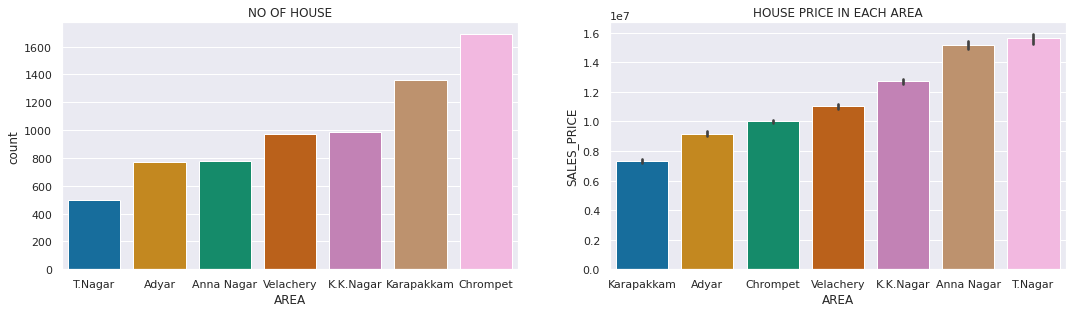

In [15]:
# area plot
fig = plt.figure(figsize =(18,10))
plt.subplot(221)
plt.title("NO OF HOUSE")
sns.countplot(x=df["AREA"],order=df['AREA'].value_counts(ascending=True).index)
plt.subplot(222)
plt.title("HOUSE PRICE IN EACH AREA")
sns.barplot(x=df.AREA,y=df.SALES_PRICE,order=df.groupby("AREA")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["AREA"])


In the above graph there is a linear relationship between AREA AND SALES PRICE


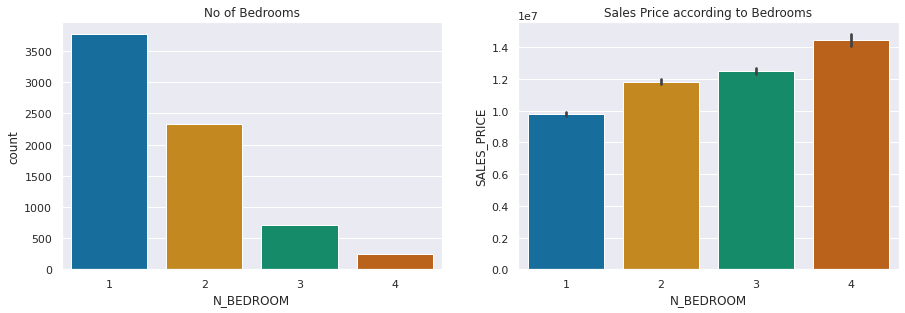

In [16]:
#bedroom
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title("No of Bedrooms")
sns.countplot(x=df.N_BEDROOM)
plt.subplot(222)
plt.title("Sales Price according to Bedrooms")
sns.barplot(x=df.N_BEDROOM,y=df.SALES_PRICE)

In the above graph there is a linear relationship between the BEDROOM AND SALES PRICE
when number of bedrooms increase the sales price also increase so there is a positive correlation

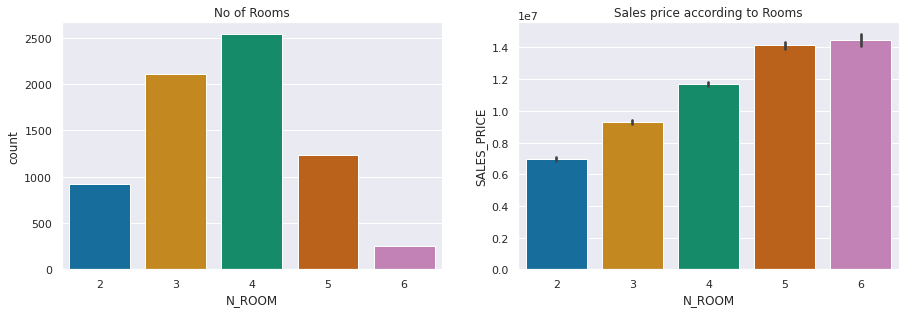

In [17]:
# rooms
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title("No of Rooms")
sns.countplot(x=df.N_ROOM)
plt.subplot(222)
plt.title("Sales price according to Rooms")
sns.barplot(x=df.N_ROOM,y=df.SALES_PRICE)

In the above graph there is a linear relationship between the ROOM AND SALES PRICE
when number of rooms increase the sales price also increase so there is a positive correlation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


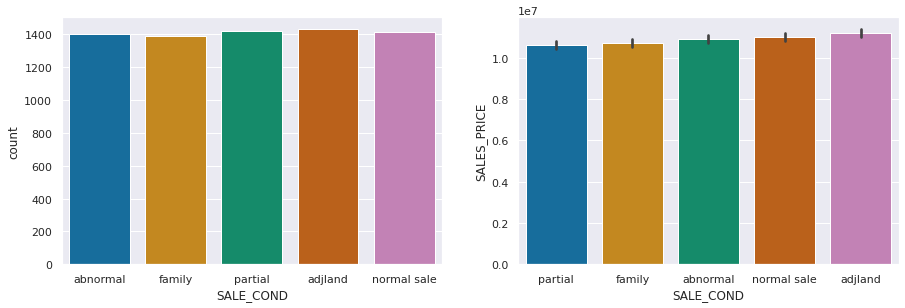

In [18]:
#sale condition
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.countplot(df.SALE_COND)
plt.subplot(222)
sns.barplot(x=df.SALE_COND,y=df.SALES_PRICE,order=df.groupby("SALE_COND")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["SALE_COND"])


In the above graph there is a linear relationship between SALE_COND and SALES_PRICE

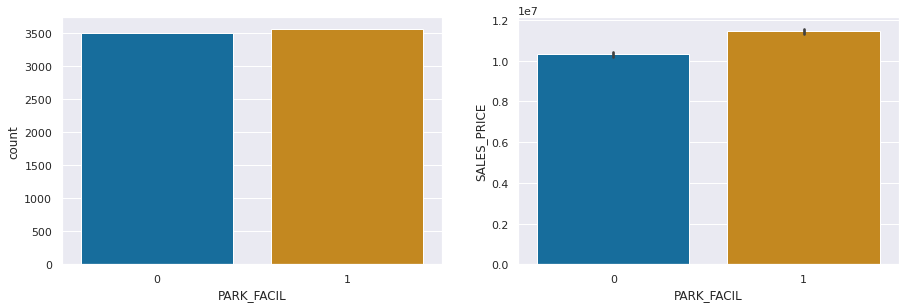

In [19]:
#parking
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.countplot(x=df.PARK_FACIL)
plt.subplot(222)
sns.barplot(x=df.PARK_FACIL,y=df.SALES_PRICE)

In the above graph there is a linear relationship between PARK_FACIL and SALES_PRICE
when parking is available the sales price increase so there is a positive correlation

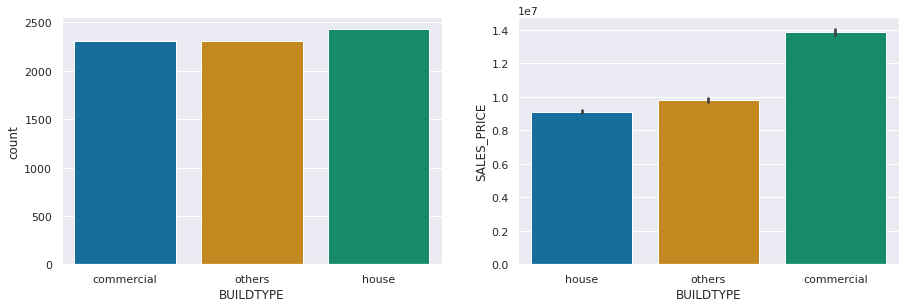

In [20]:
#building type
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.countplot(x=df.BUILDTYPE)
plt.subplot(222)
sns.barplot(x=df.BUILDTYPE,y=df.SALES_PRICE,order=df.groupby("BUILDTYPE")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["BUILDTYPE"])


In the above graph there is no linear relationship between the BUILDTYPE AND SALES PRICE

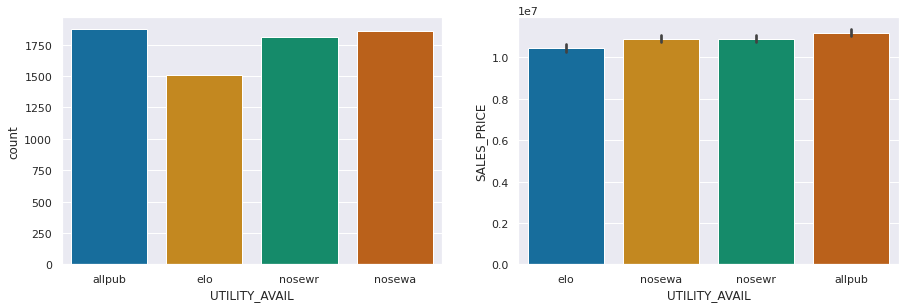

In [21]:
#utility availabel
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.countplot(x=df.UTILITY_AVAIL)
plt.subplot(222)
sns.barplot(x=df.UTILITY_AVAIL,y=df.SALES_PRICE,order=df.groupby("UTILITY_AVAIL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["UTILITY_AVAIL"])

In the above graph there is a linear relationship between the UTILITY AVAILABLE AND SALES PRICE

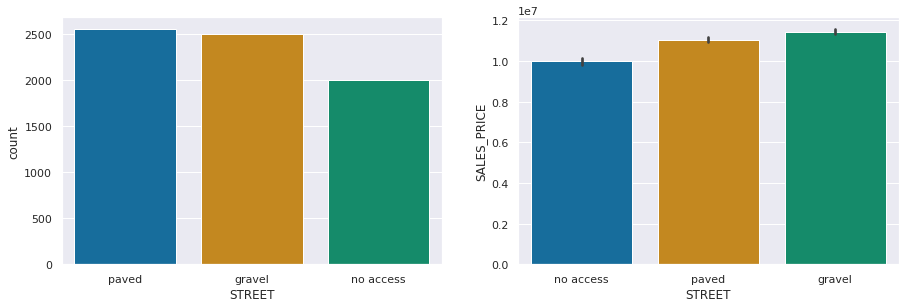

In [22]:
#street type
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.countplot(x=df.STREET)
plt.subplot(222)
sns.barplot(x=df.STREET,y=df.SALES_PRICE,order=df.groupby("STREET")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["STREET"])


In the above graph there is a linear relationship between the STREET AND SALES PRICE

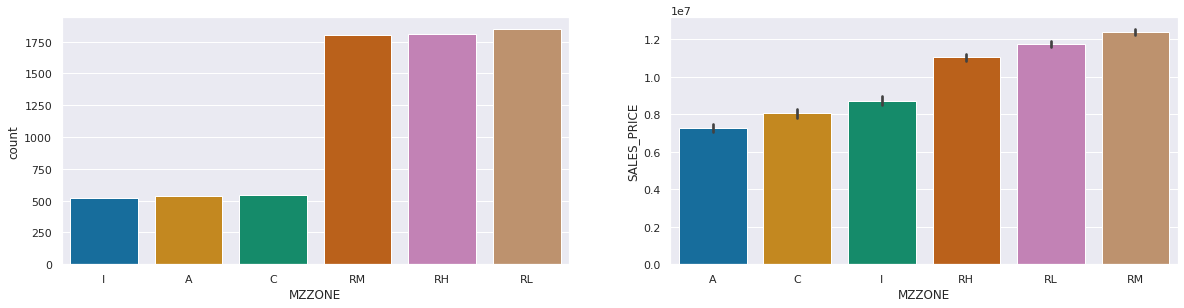

In [23]:
#zone
plt.figure(figsize=(20,10))
plt.subplot(221)

sns.countplot(x=df.MZZONE,order=df["MZZONE"].value_counts(ascending=True).index)
plt.subplot(222)
sns.barplot(x=df.MZZONE,y=df.SALES_PRICE,order=df.groupby("MZZONE")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["MZZONE"])



In the above graph there is a linear relationship between the ZONE AND SALES PRICE


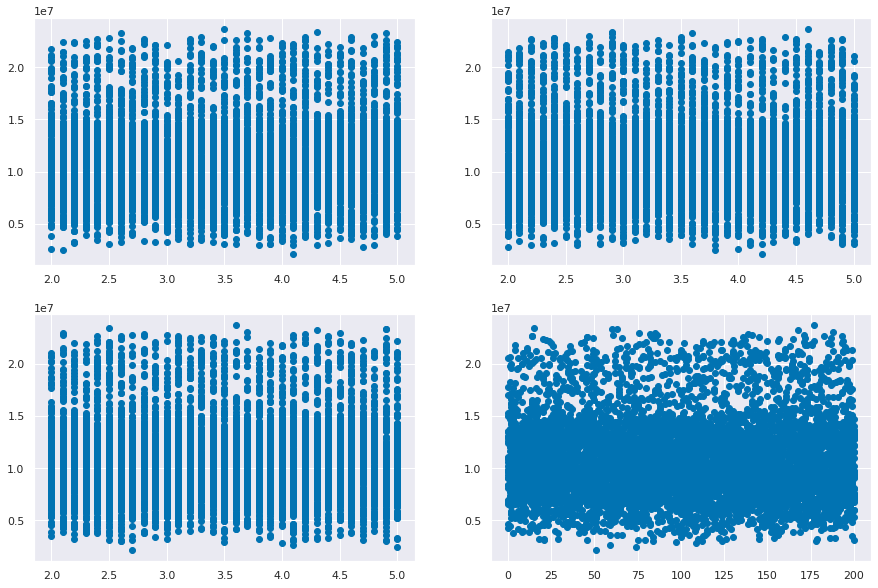

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.scatter(df.QS_ROOMS,df.SALES_PRICE)
plt.subplot(222)
plt.scatter(df.QS_BATHROOM,df.SALES_PRICE)
plt.subplot(223)
plt.scatter(df.QS_BEDROOM,df.SALES_PRICE)
plt.subplot(224)
plt.scatter(df.DIST_MAINROAD,df.SALES_PRICE)


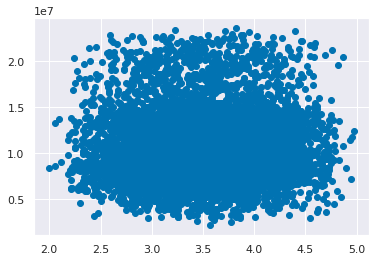

In [25]:

plt.scatter(df.QS_OVERALL,df.SALES_PRICE)

In the above graph we don't see any sort of relationship between these columns and sales price

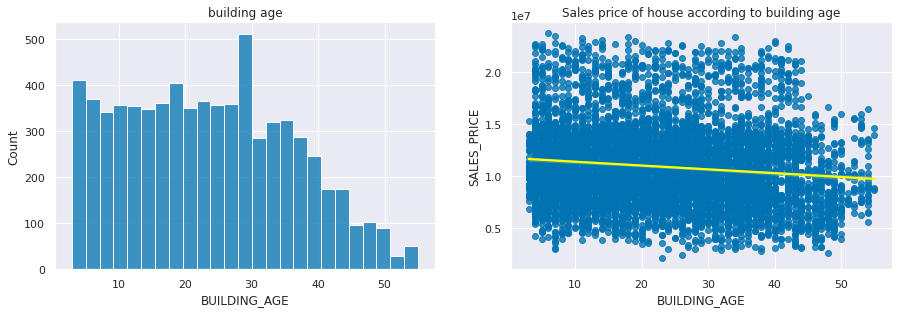

In [26]:
#building age
fig = plt.figure(figsize =(15, 10))
plt.subplot(221)
plt.title("building age")
sns.histplot(df.BUILDING_AGE)
plt.subplot(222)
plt.title("Sales price of house according to building age")
sns.regplot(x=df.BUILDING_AGE,y=df.SALES_PRICE,line_kws={"color": "yellow"})

In the above graph there is a linear relationship between BULDING AGE and SALES PRICE when age increase the price decrease there is a negative correlation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


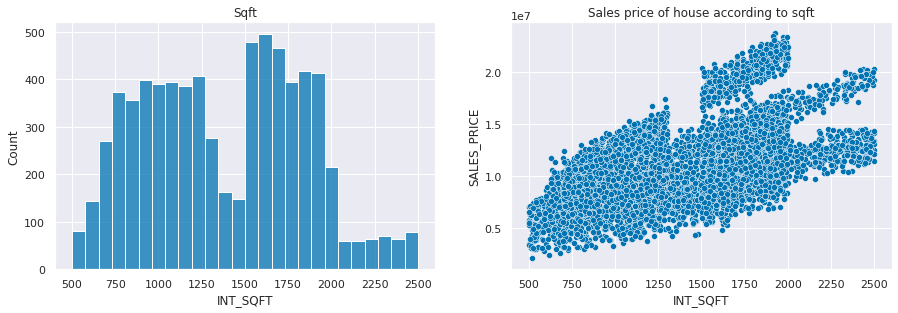

In [27]:
#sqft plot
fig = plt.figure(figsize =(15,10))
plt.subplot(221)
plt.title("Sqft")
sns.histplot(df.INT_SQFT)
plt.subplot(222)
plt.title("Sales price of house according to sqft")
sns.scatterplot(df.INT_SQFT,df.SALES_PRICE)


In the above graph there is a linear relationship between INT SQFT and SALES PRICE when sqft increase the price also increase so there is a positve correlation

In [28]:
df=df.drop(columns=["DIST_MAINROAD","QS_ROOMS","QS_BEDROOM","QS_BATHROOM","QS_OVERALL"],axis=1)

ENCODING

In [29]:
df["STREET"]=df["STREET"].map({"paved":2,"gravel":3,"no access":1})
df["UTILITY_AVAIL"]=df["UTILITY_AVAIL"].map({"elo":1,"nosewa":2,"nosewr":4,"allpub":3})
df["AREA"]=df["AREA"].map({"Karapakkam":1,"Adyar":2,"Chrompet":3,"Velachery":4,"K.K.Nagar":5,'Anna Nagar':6,'T.Nagar':7})
df["MZZONE"]=df["MZZONE"].map({"A":1,"C":2,"I":3,"RH":5,"RL":6,"RM":7})
df["SALE_COND"]=df["SALE_COND"].map({'partial':1,'family':2,'abnormal':3,'normal sale':4,'adjland':5})

For the datas which have linear relationship we do LABEL ENCODING

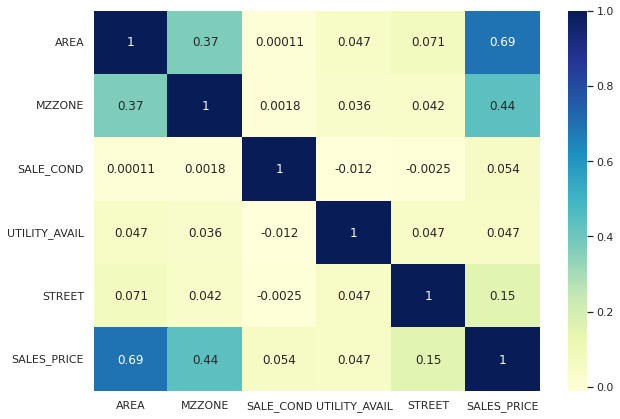

In [30]:
plt.figure(figsize=(10,7))
sns.heatmap(df[["AREA","MZZONE","SALE_COND","UTILITY_AVAIL","STREET","SALES_PRICE"]].corr(), cmap="YlGnBu", annot=True)

In [31]:
dummies=pd.get_dummies(df["BUILDTYPE"])

ONE HOT ENCODING for nominal data

In [32]:
df1=pd.concat([df,dummies],axis=1)

In [33]:
df1.drop(columns=["BUILDTYPE","DATE_SALE","DATE_BUILD"],axis=1,inplace=True)

SPLITTING

In [34]:
x=df1.drop(["SALES_PRICE"],axis=1).values
y=df1["SALES_PRICE"].values

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
y_train

array([13852750,  7944000,  8835500, ..., 21897640,  9241670, 14414800])

SCALING

In [36]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.fit_transform(x_test)

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   AREA           7056 non-null   int64
 1   INT_SQFT       7056 non-null   int64
 2   N_BEDROOM      7056 non-null   int64
 3   N_BATHROOM     7056 non-null   int64
 4   N_ROOM         7056 non-null   int64
 5   SALE_COND      7056 non-null   int64
 6   PARK_FACIL     7056 non-null   int64
 7   UTILITY_AVAIL  7056 non-null   int64
 8   STREET         7056 non-null   int64
 9   MZZONE         7056 non-null   int64
 10  SALES_PRICE    7056 non-null   int64
 11  BUILDING_AGE   7056 non-null   int64
 12  commercial     7056 non-null   uint8
 13  house          7056 non-null   uint8
 14  others         7056 non-null   uint8
dtypes: int64(12), uint8(3)
memory usage: 995.3 KB


MODEL

In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

-1.8950877423113979e+21

In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
for i in range(1,10):
     knn=KNeighborsRegressor(n_neighbors=i)
     knn.fit(x_train,y_train)
     cv=cross_val_score(knn,x,y,cv=10)
     #print(i,"accuracy",knn.score(x_test,y_test),cv.mean())

In [40]:
knn=KNeighborsRegressor(n_neighbors=9)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9502009055292461

In [41]:
x=df1.drop(["SALES_PRICE"],axis=1).values
y=df1["SALES_PRICE"].values
y

array([ 7600000, 21717770, 13159200, ...,  8351410,  8507000,  9976480])

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


model_parameters={RandomForestRegressor():{"max_features":["auto","sqrt"],"max_depth":range(1,20)}}

In [43]:
scores=[]
for i,j in model_parameters.items():
  gs=GridSearchCV(i,j,cv=5,return_train_score=False,error_score="raise")
  gs.fit(x,y)
  scores.append({
           "model":i,
          'best_score': gs.best_score_,
          'best_params': gs.best_params_
      })
x=pd.DataFrame(scores)
x

,model,best_score,best_params
0,RandomForestRegressor(),0.989544,"{'max_depth': 16, 'max_features': 'auto'}"


In [44]:
x=df1.drop(["SALES_PRICE"],axis=1).values
y=df1["SALES_PRICE"].values

In [45]:
from sklearn.model_selection import GridSearchCV
import xgboost as XGB
import warnings
warnings.filterwarnings('ignore')
scores=[]
gs=GridSearchCV(XGB.XGBRegressor(verbosity=0,n_estimators=100),
                  {"learning_rate":[0.1,0.3,0.5,0.7,0.8,1],
                   "max_depth":range(1,20)},
                   cv=5, return_train_score=False)
gs.fit(x, y)
scores.append({'best_score': gs.best_score_,
               'best_params': gs.best_params_
               })
    
x=pd.DataFrame(scores)
x

,best_score,best_params
0,0.997111,"{'learning_rate': 0.7, 'max_depth': 3}"


In [46]:
import xgboost as XGB
from sklearn.model_selection import cross_val_score

xgb=XGB.XGBRegressor(learning_rate =0.7 , n_estimators=100,max_depth=3,verbosity=0)
xgb.fit(x_train,y_train)
xgb.score(x_test,y_test)

0.9969870736305634

In [47]:
y_pred=xgb.predict(x_test)

In [48]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9969870736305634

In [92]:
#feature importance
imprt_features={}
for i,j in zip(df1.columns,xgb.feature_importances_):

   imprt_features[i]=j

imprt_features

{'AREA': 0.3656332,
 'BUILDING_AGE': 0.3980234,
 'INT_SQFT': 0.03407714,
 'MZZONE': 0.035069715,
 'N_BATHROOM': 0.029378474,
 'N_BEDROOM': 0.003073802,
 'N_ROOM': 0.013069622,
 'PARK_FACIL': 0.04587908,
 'SALES_PRICE': 0.0025453768,
 'SALE_COND': 0.0065845335,
 'STREET': 0.035872463,
 'UTILITY_AVAIL': 0.0029397695,
 'commercial': 0.02623949,
 'house': 0.0016138817}

XGBOOST model gives the best Rsquared metric of score 0.996 

FOR BUYERS

If customers wants to buy a "HOUSE"

1.I would suggest them to choose the area like karapakam or Adyar or Chrompet because sales price is lesser 

2.below I have predicted a house price in Karapakam with all amenites you can negotiate between the given range

In [88]:
model=xgb.predict([[1,1200,2,1,3,1,1,1,3,5,40,0,0,1]])
range=model[0]//5
print("Customers can negotiation between the range ",model[0]-range,"to",model[0])

Customers can negotiation between the range  10525016.0 13156270.0


FOR SELLERS

The important features where you get higher profit for your house 

1.Area where your house is located

2.Age of the Building 

3.Parking Facility

4.Gravel street

In [93]:
model=xgb.predict([[1,1200,2,1,3,1,1,1,3,5,40,0,0,1]])
range=model[0]//5
print("seller can fix betweet",model[0],"to",model[0]+range)

seller can fix betweet 14222384.0 17066860.0


FOR REAL ESTATE AGENTS

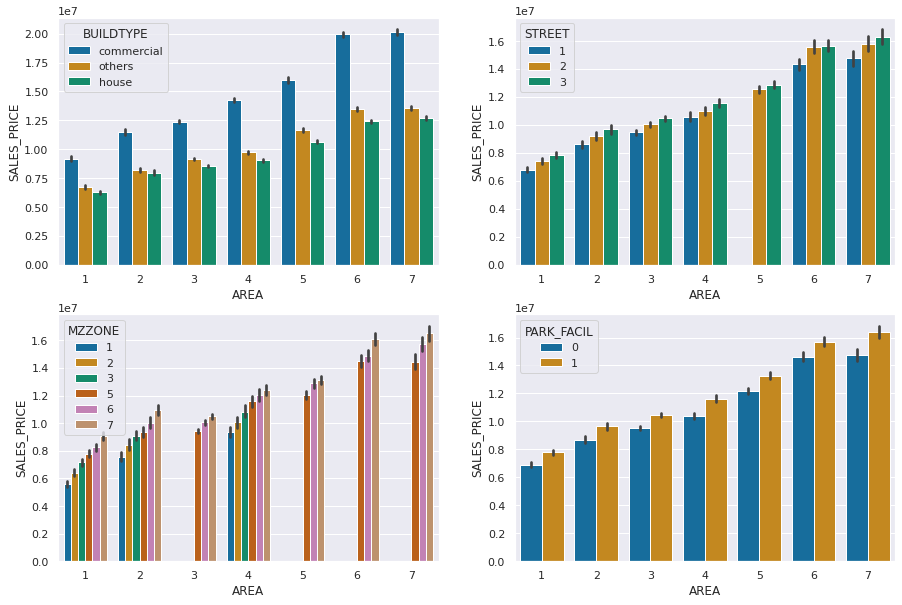

In [54]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.barplot(x=df.AREA,y=df.SALES_PRICE,hue=df.BUILDTYPE)
plt.subplot(222)
sns.barplot(x=df.AREA,y=df.SALES_PRICE,hue=df.STREET)
plt.subplot(223)
sns.barplot(x=df.AREA,y=df.SALES_PRICE,hue=df.MZZONE)
plt.subplot(224)
sns.barplot(x=df.AREA,y=df.SALES_PRICE,hue=df.PARK_FACIL)

1. In all Area the Price of the COMMERCIAL building is high
2. In all Area GRAVEL street has high sales price
3. In all Area RM zone gives high sales price
4. In all Area when Parking is available there is high sales price

For seller to get high profit i would suggest them to construct "COMMERCIAL" property rather than houses or others. when it comes to area i would suggest them to build in "T.NAGAR" or "ANNA NAGAR" which as high sales price and most importantly construct it in "RESIDENTIAL" zone along with "PARKING" facility and "GRAVEL" pathway.